/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6504733507021836

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6483912694644114

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6504524588868325

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6505008829402736

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6412339385349429

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6519515646698845

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6470537138657112

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6635279746529412

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6552152685308478

Preselection

Object selection: knn

Dfmf

Parameters

10 10 4 6


auc: 0.6493148699809141


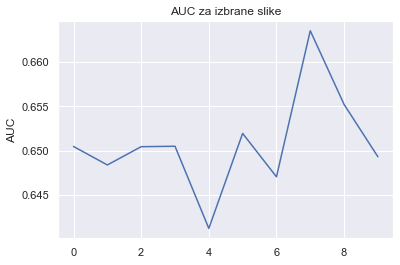

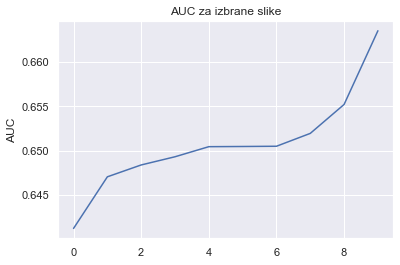

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import divide_texts, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt
from basic_factorization import BasicFactorization

# Parameters
data_directory = '../../data/generated-data-nr-2-n-04-l-100/'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5]
false_objects_indexes = [6, 7, 8, 9]

file_names = os.listdir(data_directory)
ids_vector = [int(name.split('-')[0]) for name in file_names]
categories_vector = [name.split('-')[1] for name in file_names]
ratings_vector = [int(name.split('.')[0].split('-')[2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features, new_ratings_vector, new_categories_vector, new_ids_vector, new_paths_vector, text_indexes = divide_texts(name_vector, ratings_vector, categories_vector, ids_vector, n=10)

ratings_vector = new_ratings_vector
ids_vector = new_ids_vector

cv_results_file = '../results/cv-generated-data-nr-2-n-04-l-100-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-04-l-100-knn.csv'
save_scores(scores, results_file)


Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6555716448148257

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6570886998784933

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6612193187182043

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6691051157598893

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6578897420132473

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6580740174108617

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6599132929927722

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6520809427716008

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6574354330411558

Preselection

Object selection: rf

Dfmf

Parameters

14 10 4 2


auc: 0.6465932427349915


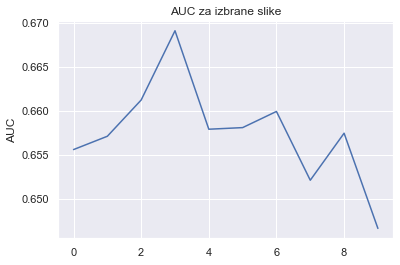

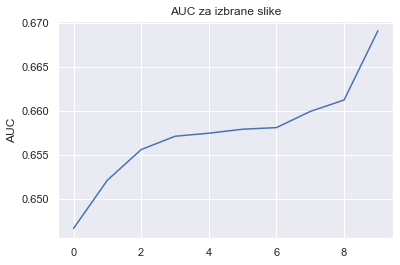

In [2]:
cv_results_file = '../results/cv-generated-data-nr-2-n-04-l-100-rf.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-04-l-100-rf.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

18 18 2 2


auc: 0.7020744267392149
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6433643043062831
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6606996726677579
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6516960955652424
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6426338548887569
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6665754773759369
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.65801333223603
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.625940723618224
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6641524136828645
Object selection: random

Dfmf

Parameters

10 10 8 6


auc: 0.6506245443033117


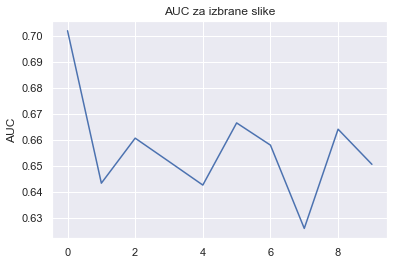

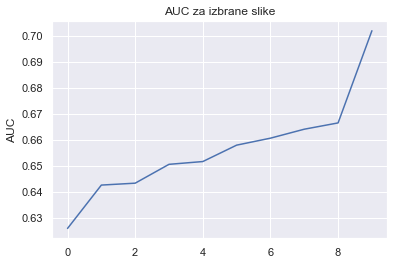

In [3]:
cv_results_file = '../results/cv-generated-data-nr-2-n-04-l-100-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-04-l-100-random.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.6786571820044164
Object selection: random

Dfmf

auc: 0.6761832632984788
Object selection: random

Dfmf

auc: 0.695368092093533
Object selection: random

Dfmf

auc: 0.6674966915946106
Object selection: random

Dfmf

auc: 0.6620174346201744
Object selection: random

Dfmf

auc: 0.6606157250715959
Object selection: random

Dfmf

auc: 0.6798515518247842
Object selection: random

Dfmf

auc: 0.6743824963666519
Object selection: random

Dfmf

auc: 0.6493513934726806
Object selection: random

Dfmf

auc: 0.6651932524300841


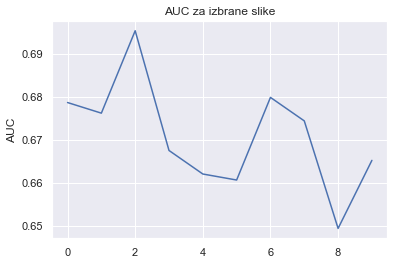

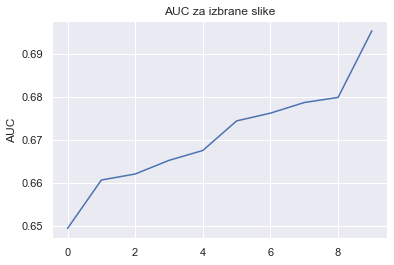

In [4]:
cv_results_file = '../results/cv-generated-data-nr-2-n-04-l-100-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=text_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-04-l-100-b.csv'
save_scores(scores, results_file)